#**수정사항**
1. 소문자 변환, '_'기호 ' '로 치환
2. 각 컬럼별 target 비율 값 추가
***
#**순서**
1. 각 컬럼별 value_counts(), unique(), 데이터 분포 시각화 등 (기존)
2. 각 컬럼별 target 비율 값 (추가)
3. lead_desc_length 제외 모든 컬럼들 target 비율 (True Ratio 기준 정렬)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_train = pd.read_csv("/content/drive/MyDrive/LGAimers/data/train.csv") # 학습용 데이터
df_test = pd.read_csv("/content/drive/MyDrive/LGAimers/data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [7]:
# inqury_type 소문자 변환 밑 '_'기호 없애기
for column in df_train.columns:
    # 컬럼 데이터 타입이 문자열인 경우에만 변환을 수행
    if df_train[column].dtype == 'object':
        df_train[column] = df_train[column].str.lower().str.replace('_', ' ')

In [8]:
# inqury_type 소문자 변환 밑 '_'기호 없애기
for column in df_test.columns:
    # 컬럼 데이터 타입이 문자열인 경우에만 변환을 수행
    if df_test[column].dtype == 'object':
        df_test[column] = df_test[column].str.lower().str.replace('_', ' ')

In [9]:
df_train.head(3)

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/quezon city/philippines,as,0.066667,32160,end-customer,enterprise,NaN,NaN,NaN,...,lgeph,less than 3 months,1,0,0.003079,0.026846,corporate / office,engineering,0,True
1,1.0,/ph-00/philippines,as,0.066667,23122,end-customer,enterprise,12.0,NaN,NaN,...,lgeph,less than 3 months,1,0,0.003079,0.026846,corporate / office,advertising,1,True
2,1.0,/kolkata /india,as,0.088889,1755,end-customer,enterprise,144.0,NaN,NaN,...,lgeil,less than 3 months,1,0,0.003079,0.026846,corporate / office,construction,2,True


In [10]:
df_test.head(3)

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,19844,0.00,/ / brazil,id,0.073248,47466,end customer,enterprise,53.0,NaN,...,lgesp,NaN,1,0,0.001183,0.049840,retail,electronics & telco,278,False
1,9738,0.25,400 n state of franklin rd cloud it / johnson...,it,NaN,5405,end customer,smb,NaN,NaN,...,lgeus,NaN,0,0,0.000013,NaN,transportation,others,437,False
2,8491,1.00,/ / u.a.e,id,NaN,13597,specifier/ influencer,smb,NaN,NaN,...,lgegf,less than 3 months,0,0,0.000060,0.131148,hospital & health care,general hospital,874,False


In [11]:
df_test = df_test.drop("id", axis=1)
df_origin = pd.concat([df_train, df_test], ignore_index=True)
df_origin.head(3)

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/quezon city/philippines,as,0.066667,32160,end-customer,enterprise,NaN,NaN,NaN,...,lgeph,less than 3 months,1,0,0.003079,0.026846,corporate / office,engineering,0,True
1,1.0,/ph-00/philippines,as,0.066667,23122,end-customer,enterprise,12.0,NaN,NaN,...,lgeph,less than 3 months,1,0,0.003079,0.026846,corporate / office,advertising,1,True
2,1.0,/kolkata /india,as,0.088889,1755,end-customer,enterprise,144.0,NaN,NaN,...,lgeil,less than 3 months,1,0,0.003079,0.026846,corporate / office,construction,2,True


In [12]:
df = df_origin[['lead_desc_length','inquiry_type','product_category','product_subcategory','product_modelname','expected_timeline','is_converted']]
df.head(3)

,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,expected_timeline,is_converted
0,62,quotation or purchase consultation,multi-split,NaN,NaN,less than 3 months,True
1,96,quotation or purchase consultation,multi-split,NaN,NaN,less than 3 months,True
2,56,product information,single-split,NaN,NaN,less than 3 months,True


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64570 entries, 0 to 64569
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_desc_length     64570 non-null  int64 
 1   inquiry_type         62337 non-null  object
 2   product_category     43338 non-null  object
 3   product_subcategory  10028 non-null  object
 4   product_modelname    9791 non-null   object
 5   expected_timeline    31299 non-null  object
 6   is_converted         64570 non-null  bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 3.0+ MB


In [14]:
df.isnull().sum()

lead_desc_length           0
inquiry_type            2233
product_category       21232
product_subcategory    54542
product_modelname      54779
expected_timeline      33271
is_converted               0
dtype: int64

In [15]:
def visualize(series,n):
    # 상위 n개만 시각화
    top_categories = series.value_counts().head(n).index
    # 상위 10개 범주에 대한 데이터만 필터링하고, 그 중에서도 'value_counts'의 내림차순으로 정렬
    top_categories_sorted = series[series.isin(top_categories)].value_counts().index
    # 시각화를 위한 DataFrame 생성
    top_categories_df = series[series.isin(top_categories)].to_frame(name='category')
    # 시각화
    plt.figure(figsize=(10, 6))
    sns.countplot(y='category', data=top_categories_df, order=top_categories_sorted)
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()

In [35]:
def visualize_top_categories_with_ratio(df, column_name, top_n=10, target='is_converted'):
    # 상위 N개의 카테고리 선택
    top_categories = df[column_name].value_counts().head(top_n).index

    # 각 카테고리 별로 target의 True, False 개수 집계
    agg_df = df[df[column_name].isin(top_categories)].groupby([column_name, target]).size().unstack(fill_value=0)

    # True와 False의 합계를 기준으로 내림차순 정렬
    agg_df['total'] = agg_df.sum(axis=1)
    agg_df_sorted = agg_df.sort_values(by='total', ascending=False).drop('total', axis=1)

    # Stacked bar plot 시각화
    ax = agg_df_sorted.plot(kind='barh', stacked=True, figsize=(10, 6))
    plt.title(f'Top {top_n} {column_name} by Conversion Status - Descending Order')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.legend(title='Is Converted', labels=['False', 'True'], loc='lower right')
    plt.gca().invert_yaxis()  # y축의 순서를 뒤집어 내림차순으로 표시

    # True Ratio 값을 막대 위에 표시
    for index, (category, row) in enumerate(agg_df_sorted.iterrows()):
        total_count = row.sum()
        true_ratio = row[True] / total_count if total_count > 0 else 0
        # 막대의 오른쪽 끝에 True Ratio 텍스트 추가
        ax.text(row.sum(), index, f' True Ratio: {true_ratio:.2f}', va='center', ha='left')

    # # 각 막대의 끝에 Total Count 텍스트 추가
    # for p in ax.patches:
    #     ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f' {int(p.get_width())}', va='center')

    plt.show()

###**lead_desc_length (log_transform)**

In [36]:
def log_transform(dataframe, column_name):
    """
    데이터 프레임 내의 특정 컬럼에 대해 자연 로그 변환을 수행하는 함수.

    Parameters:
    - dataframe: pandas DataFrame, 로그 변환을 적용할 데이터 프레임.
    - column_name: str, 로그 변환을 적용할 컬럼의 이름.

    Returns:
    - 변환된 컬럼을 포함한 새로운 데이터 프레임.
    """
    # 데이터 프레임 복사본 생성
    transformed_df = dataframe.copy()
    # 로그 변환 적용 (np.log1p를 사용하여 0의 값을 처리)
    transformed_df[column_name] = np.log(transformed_df[column_name])
    return transformed_df

In [37]:
transformed_df = log_transform(df_train, 'lead_desc_length')
transformed_df

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,lead_desc_length_cate
0,1.00,/quezon city/philippines,as,0.066667,32160,end-customer,enterprise,NaN,NaN,NaN,...,less than 3 months,1,0,0.003079,0.026846,corporate / office,engineering,0,True,30-92
1,1.00,/ph-00/philippines,as,0.066667,23122,end-customer,enterprise,12.0,NaN,NaN,...,less than 3 months,1,0,0.003079,0.026846,corporate / office,advertising,1,True,92+
2,1.00,/kolkata /india,as,0.088889,1755,end-customer,enterprise,144.0,NaN,NaN,...,less than 3 months,1,0,0.003079,0.026846,corporate / office,construction,2,True,30-92
3,1.00,/bhubaneswar/india,as,0.088889,4919,end-customer,enterprise,NaN,NaN,NaN,...,less than 3 months,1,0,0.003079,0.026846,corporate / office,it/software,3,True,30-92
4,1.00,/hyderabad/india,as,0.088889,17126,specifier/ influencer,enterprise,NaN,NaN,NaN,...,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True,92+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/sląskie/poland,as,NaN,33747,end customer,smb,NaN,NaN,NaN,...,3 months ~ 6 months,0,0,0.000026,0.028777,public facility,others,694,False,92+
59295,0.75,/bogotá dc /colombia,as,0.040000,35420,specifier/ influencer,enterprise,NaN,NaN,NaN,...,9 months ~ 1 year,0,0,0.000026,0.028777,public facility,NaN,39,False,30-92
59296,0.75,/pisco/peru,as,0.040000,19249,specifier/ influencer,enterprise,NaN,NaN,NaN,...,less than 3 months,0,0,0.000026,0.028777,public facility,NaN,125,False,30-92
59297,1.00,/santa cruz bolivia/peru,as,0.040000,40327,NaN,enterprise,NaN,NaN,NaN,...,more than a year,0,0,0.000026,0.028777,public facility,NaN,134,False,92+


In [38]:
transformed_df['lead_desc_length'].describe()

count    59299.000000
mean         3.282058
std          1.594069
min          0.000000
25%          1.945910
50%          3.367296
75%          4.521789
max          7.142037
Name: lead_desc_length, dtype: float64

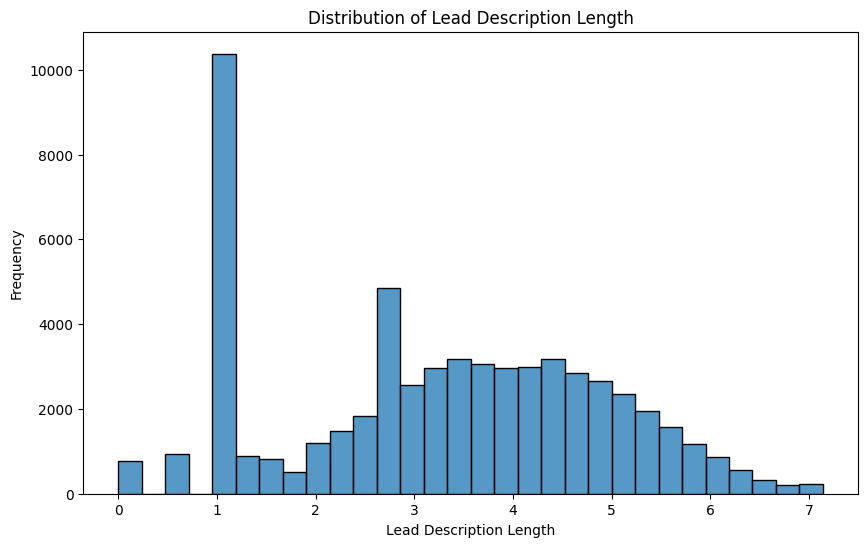

In [39]:
# 데이터의 분포를 히스토그램으로 표시
plt.figure(figsize=(10, 6))
sns.histplot(transformed_df['lead_desc_length'], bins=30, kde=False)
plt.title('Distribution of Lead Description Length')
plt.xlabel('Lead Description Length')
plt.ylabel('Frequency')
plt.show()

In [40]:
#사분위 기준 Train data - Ture 분포
# lead_desc_length 컬럼을 범주형 데이터로 변환(분위 수 기)
bins = [0, 1.9, 3.4, 4.5, transformed_df['lead_desc_length'].max()]
labels = ['0-1.9', '2-3.4', '3.5-4.5', '4.5+']
transformed_df['lead_desc_length_cate'] = pd.cut(transformed_df['lead_desc_length'], bins=bins, labels=labels)

# 변환 결과 확인
cate_counts = transformed_df.groupby(['lead_desc_length_cate', 'is_converted']).size().unstack()
cate_counts['data_count'] = transformed_df['lead_desc_length_cate'].value_counts()
cate_counts['True_percentage'] = (cate_counts[True] / (cate_counts[False] + cate_counts[True])) * 100
cate_counts

is_converted,False,True,data_count,True_percentage
lead_desc_length_cate,,,,
0-1.9,12959,557,13516,4.121042
2-3.4,14763,647,15410,4.198572
3.5-4.5,13213,1391,14604,9.524788
4.5+,12748,2250,14998,15.002000


### **lead_desc_length**

In [41]:
df['lead_desc_length'].describe()

count    64570.000000
mean        79.479309
std        132.758693
min          1.000000
25%          7.000000
50%         29.000000
75%         93.000000
max       1264.000000
Name: lead_desc_length, dtype: float64

In [42]:
#사분위 기준 Train data - Ture 분포
# lead_desc_length 컬럼을 범주형 데이터로 변환(분위 수 기)
bins = [0, 7, 29, 92, df_train['lead_desc_length'].max()]
labels = ['0-7', '8-29', '30-92', '92+']
df_train['lead_desc_length_cate'] = pd.cut(df_train['lead_desc_length'], bins=bins, labels=labels)

# 변환 결과 확인
cate_counts = df_train.groupby(['lead_desc_length_cate', 'is_converted']).size().unstack()
cate_counts['data_count'] = df_train['lead_desc_length_cate'].value_counts()
cate_counts['True_percentage'] = (cate_counts[True] / (cate_counts[False] + cate_counts[True])) * 100
cate_counts

is_converted,False,True,data_count,True_percentage
lead_desc_length_cate,,,,
0-7,14360,583,14943,3.901492
8-29,14128,626,14754,4.242917
30-92,13453,1429,14882,9.602204
92+,12508,2212,14720,15.027174


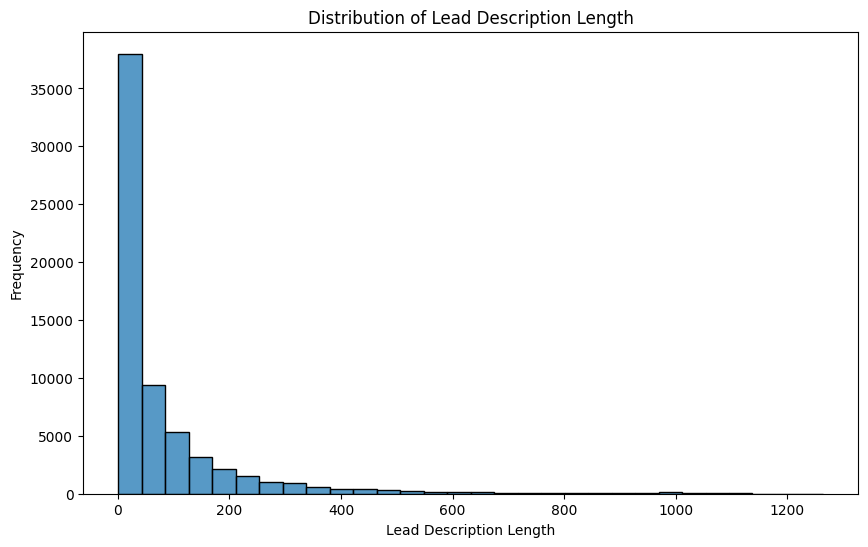

In [43]:
# 데이터의 분포를 히스토그램으로 표시
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_desc_length'], bins=30, kde=False)
plt.title('Distribution of Lead Description Length')
plt.xlabel('Lead Description Length')
plt.ylabel('Frequency')
plt.show()

***
1. length 길어질수록 True 비율이 높긴 함
2. 범주화 시키거나 너무 높은 값들은 600이하로 치환 고려
***

###**inquiry_type**

In [44]:
df['inquiry_type'].value_counts()

quotation or purchase consultation                                                                                     45603
sales inquiry                                                                                                           9981
product information                                                                                                     1305
usage or technical consultation                                                                                         1242
other                                                                                                                    960
technical consultation                                                                                                   568
trainings                                                                                                                455
services                                                                                                                 449


In [45]:
df['inquiry_type'].unique()

array(['quotation or purchase consultation', 'product information',
       'other', 'usage or technical consultation', 'trainings',
       'services', 'sales inquiry', 'etc.', 'technical support',
       'technical consultation', 'request for partnership', nan, 'sales',
       'technical', 'other ', 'request a demo',
       'request for distributorship', 'request for quotation or purchase',
       'request for technical consulting', '(select id needs)',
       'one quick:flex', 'aio', 'needs', 'purchase',
       'customer suggestions', 'event inquiry', 'others',
       'oem/odm request', 'hospital tv',
       'i want to know the details about it', 'educational equipments',
       'digital platform', 'tv interactive', 'teach',
       'display textbook and photos', 'high inch 86 / 98 or 110',
       'quotation ', 'purchase or quotation', 'display product',
       'first info and pricing',
       'estoy buscando para ecuador este producto lg magnit micro led, para un cliente de 138 pulgad

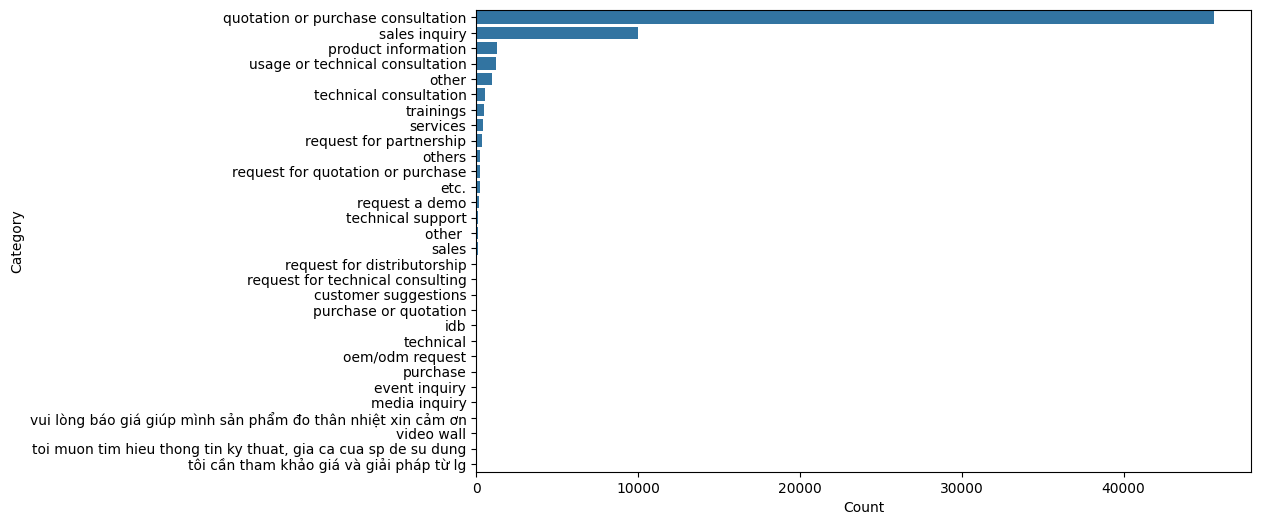

In [46]:
# inqury_type의 범주 분포 시각화
visualize(df['inquiry_type'],30)

In [47]:
# inqury_type 소문자 변환 밑 '_'기호 없애기
df_train['inquiry_type'] = df_train['inquiry_type'].str.lower()
df_train['inquiry_type'] = df_train['inquiry_type'].str.replace('_', ' ')
print(len(df_train['inquiry_type'].unique()))
df_train['inquiry_type'].value_counts()

61


quotation or purchase consultation                                                                                     42138
sales inquiry                                                                                                           9981
product information                                                                                                     1237
usage or technical consultation                                                                                         1190
other                                                                                                                    951
trainings                                                                                                                434
technical consultation                                                                                                   433
services                                                                                                                 415


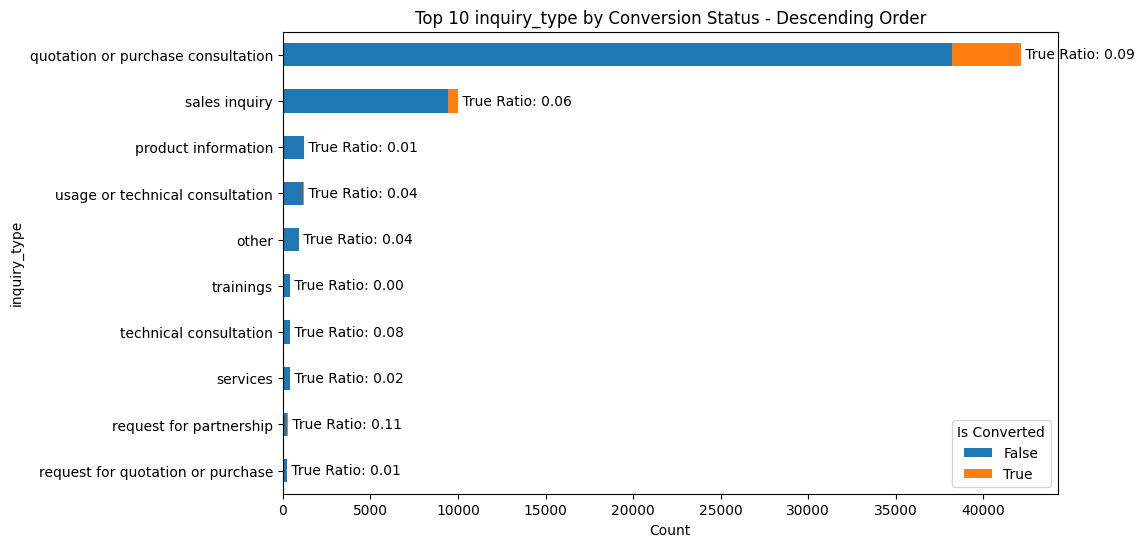

In [48]:
#train_data내에서 inqury_type의 target비율 확인

visualize_top_categories_with_ratio(df_train, 'inquiry_type', top_n=10, target='is_converted')

***
<전처리 아이디어>
1. Quotation or puchase consultation  
   Quotation or Puchase Consultation  
   quotation_or_qurchase_consultation  
   비슷한 단어 처리
2. 상위 20개 정도만 남기고 나머지 other or etc 처리(영어 외의 외국어)
***


###**product_category**

In [49]:
df['product_category'].value_counts()

vrf                          6366
interactive digital board    6228
multi-split                  4218
interactive signage          2262
etc.                         2220
                             ... 
32 / 43 pol                     1
43uq751c0sb.bwz                 1
49uh / 49xf                     1
50us660h0sd.bwz                 1
notebook                        1
Name: product_category, Length: 359, dtype: int64

In [50]:
df['product_category'].unique()

array(['multi-split', 'single-split', 'vrf', 'chiller', 'etc.', 'rac',
       'teto ou cassete inverter', nan, 'software solution',
       'all lg vrf systems', 'ventilation',
       'a thermodynamic water heater', 'residential air conditioner',
       'outros', 'heating', 'multi v5 vrf', 'split tunggal',
       'multi inverter', 'חימום', 'standard signage',
       'high brightness signage', 'interactive signage',
       'video wall signage', 'led signage', 'hotel tv',
       'signage care solution', 'oled signage', 'idb', 'video wall',
       'one:quick series', 'commercial tv', 'lg one:quick',
       'special signage', 'other', 'accessories', 'commercial display',
       'interactive digital board', 'standard', 'uhd signage',
       'smart tv signage', 'lg one:quick series', 'pro:centric', 'ur640',
       'ur640s', 'webos', 'signage care solutions', 'aio | one quick',
       'high brightness', 'hospital tv', 'digital signage', 'monitor',
       'pc', 'laptop', 'projector', 'cloud dev

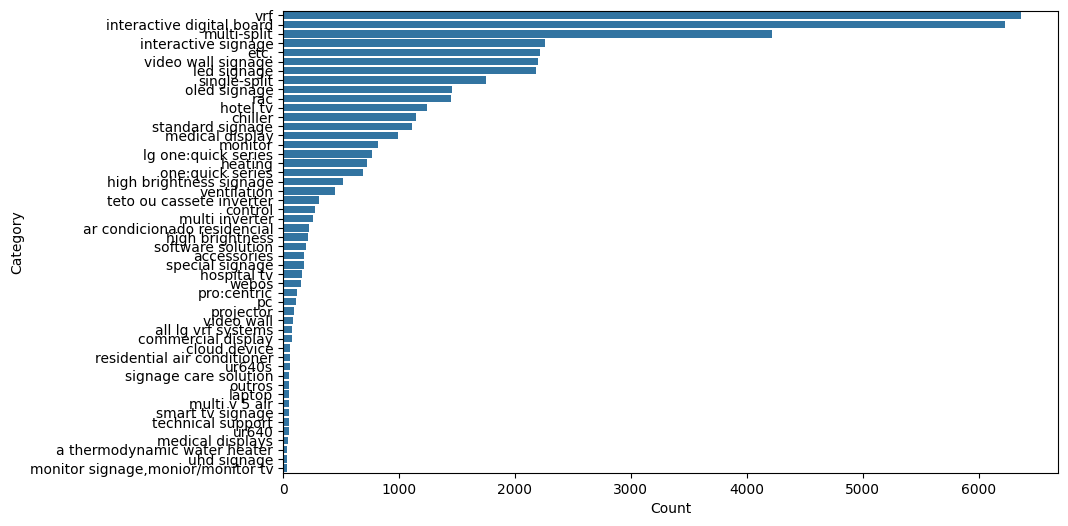

In [51]:
visualize(df['product_category'],50)

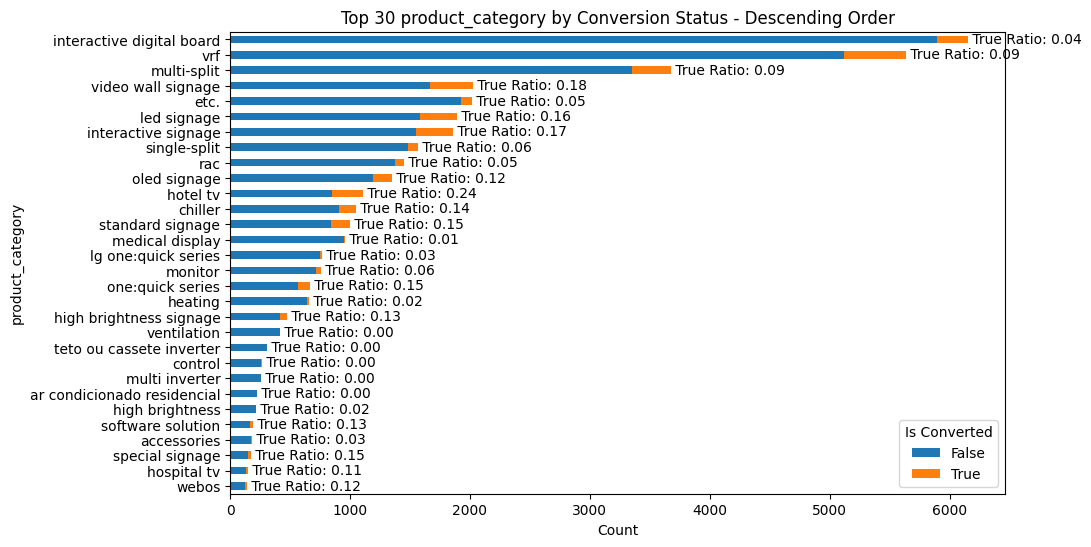

In [60]:
#train_data내에서 product_category의 target비율 확인

visualize_top_categories_with_ratio(df_train, 'product_category', top_n=30, target='is_converted')

***
'monior/monitor tv,refrigerator',  
'monior/monitor tv,system ac,tv,pc,refrigerator,water care,solar,washing machine,mobile,chiller,built'  
  
'vrf,multi-split,single-split,chiller',  
'vrf,multi-split,single-split,heating', 'vrf,single-split,chiller'  
  
이런 데이터 어떻게 하는지...?
***

###**product_subcategory & product_modelname**

In [53]:
df['product_subcategory'].value_counts()

all medical displays         447
interactive digital board    446
tr3bf series                 377
transparent led film         332
transparent oled signage     310
                            ... 
flat oled sigange              1
wallpaper oled                 1
fine pitch                     1
video-wall oled signage        1
cirugia                        1
Name: product_subcategory, Length: 350, dtype: int64

In [54]:
df['product_modelname'].value_counts()

ultrafine ergo(32un880)    525
28mq780                    479
all medical displays       350
43ht3wj                    295
55ct5wj                    267
                          ... 
lbae026                      1
86ur340c (na)                1
55se3ke-b                    1
55us660h0sd.bwz              1
laaa015                      1
Name: product_modelname, Length: 698, dtype: int64

In [55]:
df['product_subcategory'].unique()

array([nan, 'new high haze uhd standard signage', 'window facing display',
       'lg createboard', 'ur640s series', 'tr3dj series',
       'webos uhd signage', 'tn3f series', 'sm3g series',
       '55" 500 nits fhd 0.44mm even bezel video wall', 'uh5f-h series',
       'interactive digital board', 'createboard', 'uhd tv signage',
       '55" 700 nits fhd 0.44mm even bezel video wall', 'lt340c series',
       'ultra narrow bezel video wall', 'fine-pitch essential series',
       'ut640s series', 'outdoor display', 'tr3bg series',
       'supersign cms', 'touch open frame', 'lt341h series',
       'total care solution', 'ultra slim series', 'lg magnit',
       'wallpaper oled signage', 'indoor versatile series', 'vl5f series',
       'transparent oled', 'ta3e series', 'onequick flex', 'ul3j',
       'compact series', 'tr3bf series', '4k uhd smart tv',
       'transparent led film', 'one:quick flex',
       'one:quick works for zoom rooms', 'transparent oled signage',
       'lg simple e

In [56]:
df['product_modelname'].unique()

array([nan, '98uh5j-h', '75xs4g', '86tr3dk', '43ur640s', '86tr3dj',
       '75ul3j-b', '22sm3g-b', '55vsm5j', '55uh5f-h', '75tc3d', '86tr3pj',
       '65ur640s (asia)', '55vsh7j', '43lt340c (eu)', '55lv77d',
       'las009-f', '55ut640s (asia)', '98tr3pj', '75tr3dj', '55tr3bg',
       '65tr3dk', '43tnf5j', '43lt341h (eu)', '55ul3j-b',
       '55ur640s (eu/cis)', '55ur640s', 'lsab009', 'lsca039', '55vl5f-a',
       '55ew5g', '43ta3e', '43ht3wj', '43ul3j', '86tr3e', '65tr3bf-b',
       '65uq801c (india)', '32lt340c', 'lat140', 'lscb018', '55ct5wj-zj',
       '55ew5pg-s', '55vh7b', '86uh5j-h', '55ew5tk-a', '32sm5j-b',
       '55vl7f-a', '49vl5g-m', '55ct5wj', '65tr3dj', '32sm5j', '65ev5e',
       '55vl5f', '55tc3cd', '110um5j', '49xe4f-m', '75uh5j-h', '55ew5g-v',
       '49vl5g', '49vl5f-a', '49vl5pj', '55lv75d', '55xs4j-b', '55vm5j-h',
       'sc-00da', '85tr3bf', '55vx1d', '49lt560h (na)',
       'lg supersign cms', '55uh5f-b', '55lv35a', '55ef5g-p', '49lt340c',
       '55svh7f', '32ta3

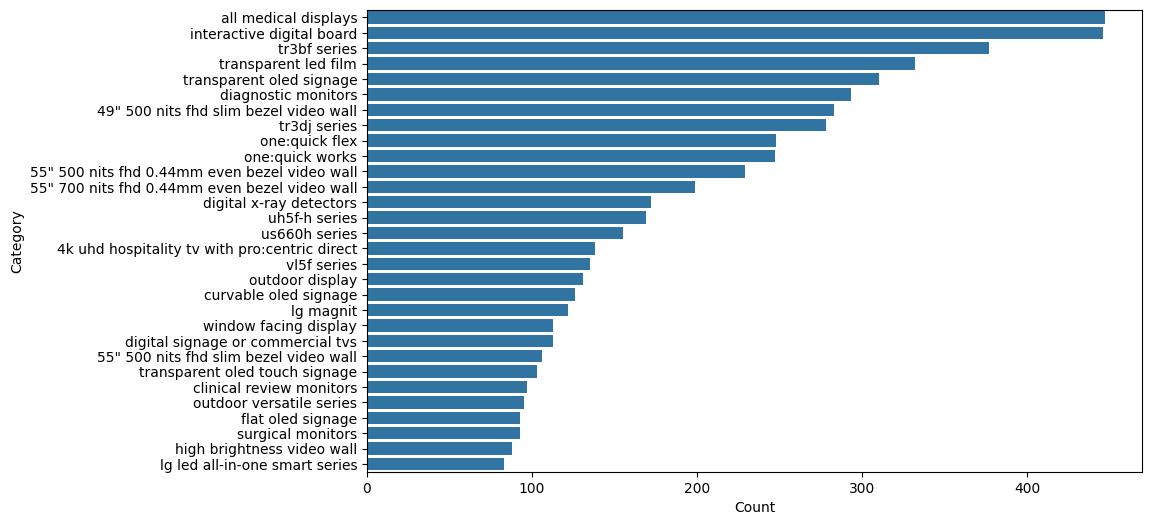

In [57]:
visualize(df['product_subcategory'],30)

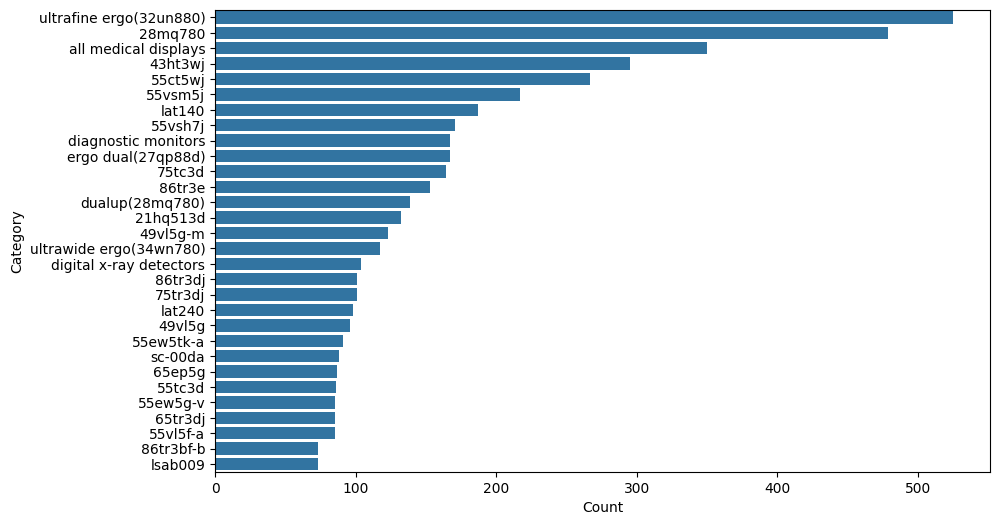

In [58]:
visualize(df['product_modelname'],30)

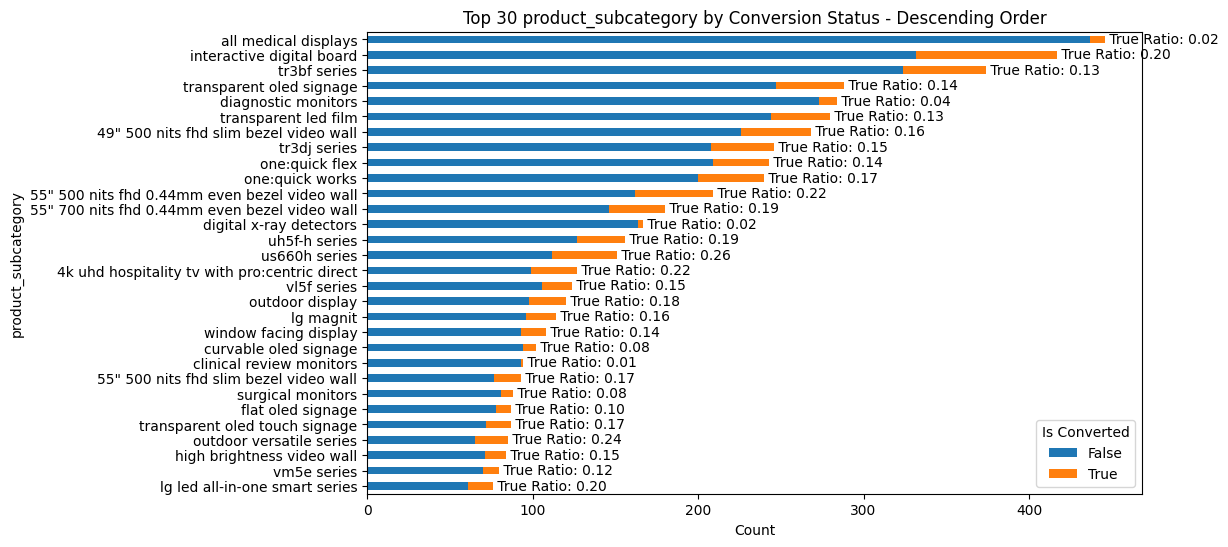

In [61]:
#train_data내에서 product_subcategory의 target비율 확인

visualize_top_categories_with_ratio(df_train, 'product_subcategory', top_n=30, target='is_converted')

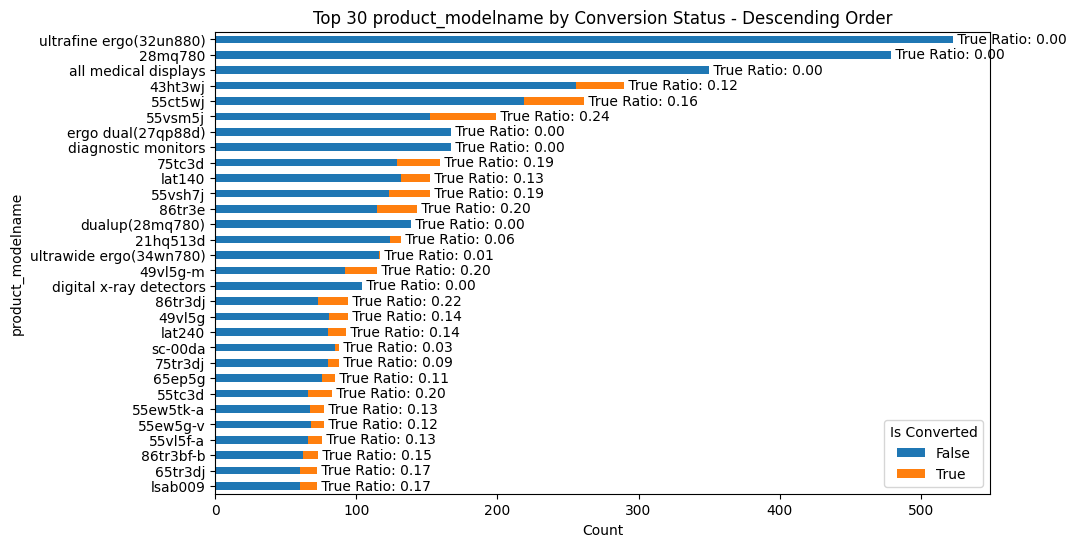

In [62]:
#train_data내에서 product_modelname의 target비율 확인

visualize_top_categories_with_ratio(df_train, 'product_modelname', top_n=30, target='is_converted')

***
<전처리 아이디어>
1. 결측치가 너무 많음 -> drop 고려
***

###**expected_timeline**

In [63]:
df['expected_timeline'].value_counts()

less than 3 months                                                                                                            19060
3 months ~ 6 months                                                                                                            5461
more than a year                                                                                                               3299
9 months ~ 1 year                                                                                                              1371
6 months ~ 9 months                                                                                                            1269
                                                                                                                              ...  
no requirement of this time                                                                                                       1
not reachable , lead shared with partner                                    

In [64]:
df['expected_timeline'].unique()

array(['less than 3 months', nan, '3 months ~ 6 months',
       '9 months ~ 1 year', 'more than a year', '6 months ~ 9 months',
       'quote has been sent to customer.',
       'partner was exploring on eol model for some requiremeent. no designated sales or closure expected hence closing in the system.',
       'already close in july purchse with rd',
       'client not interested in product.. receing call and not answering properly',
       'being followed up', 'being followed up.',
       'repeated inquiry from client. he was just inquiring but have not confimred on purchase. we have tried mulitple times but client is not interested in buying.',
       'update- 7th aug--demo given. customer will confirm next week',
       "tried to reach him multipe times from last 7 days but couldn't get through",
       'details send', 'discused with ankit in dehli',
       'requires detail for tender. no purchase requirement right now.',
       'partner is into static signages. he need to connec

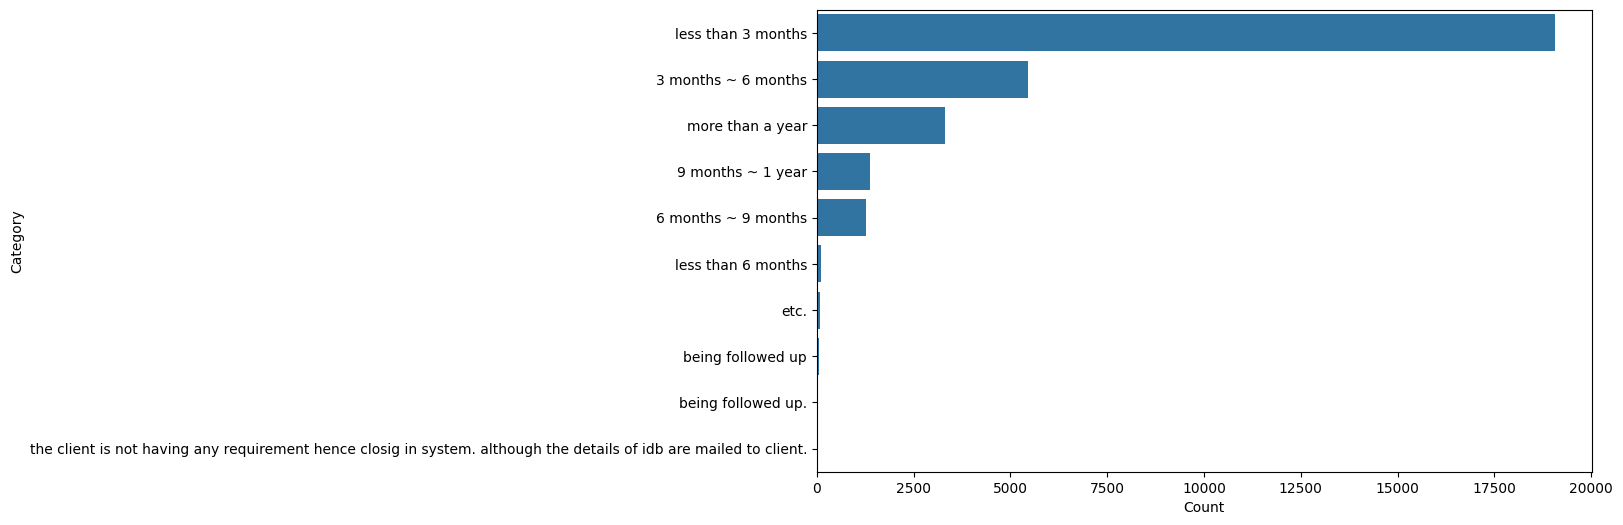

In [65]:
visualize(df['expected_timeline'],10)

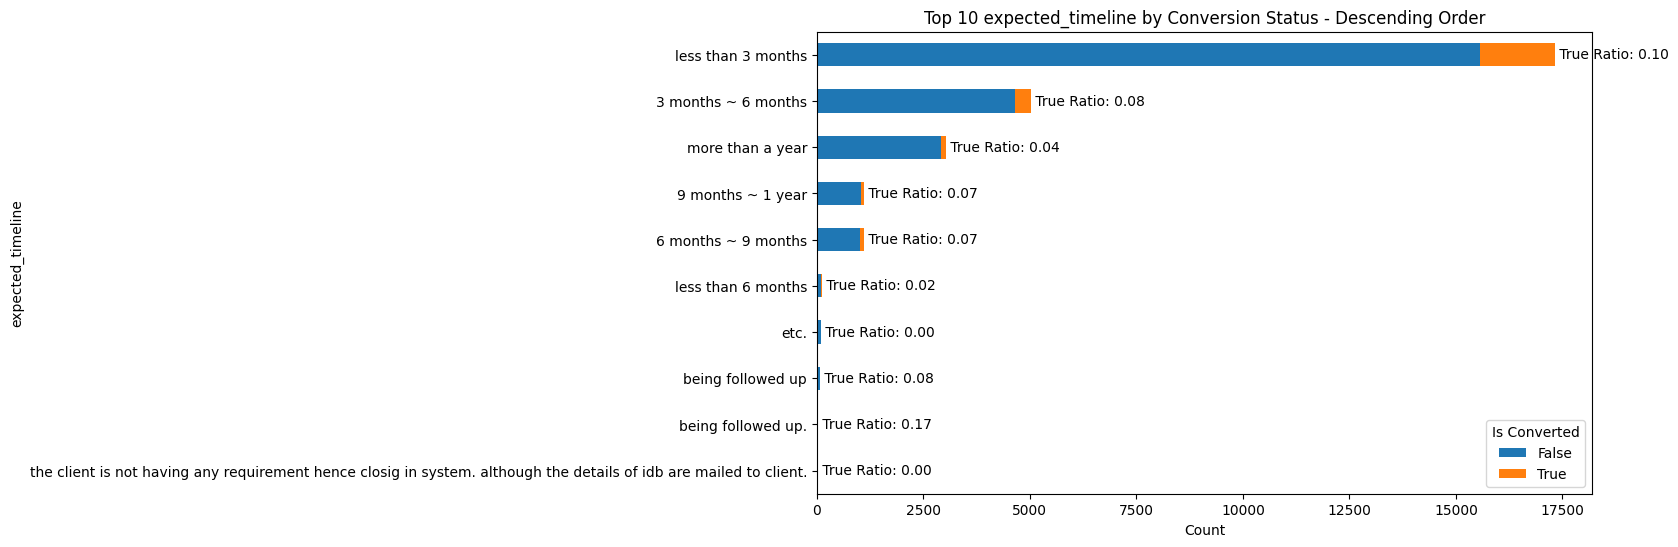

In [66]:
#train_data내에서 expected_timeline의 target비율 확인

visualize_top_categories_with_ratio(df_train, 'expected_timeline', top_n=10, target='is_converted')

***
<전처리 아이디어>
1. 비슷한 값 통일 (less than 3 months, less_than_3_months)
2. 상위값들만 조금 남겨놓고 나머지 etc .. 처리
***

###**각 컬럼별 True Ratio 정렬**

In [67]:
def show_binary_ratio_sorted2(df_input, selected_columns: list, target: str):
    for column in selected_columns:
        print(f'{column}: {df_input[column].notnull().sum()}')

        # Get unique values in the column
        unique_values = df_input[column].dropna().unique()
        value_ratios_counts = []

        for value in unique_values:
            # For each unique value, count occurrences of target 0 and 1
            count_0 = df_input[(df_input[column] == value) & (df_input[target] == False)].shape[0]
            count_1 = df_input[(df_input[column] == value) & (df_input[target] == True)].shape[0]
            count_01 = count_0 + count_1
            true_ratio = count_1 / count_01 if count_01 > 0 else 0

            value_ratios_counts.append((value, true_ratio, count_01))
        # Get unique values in the column
        unique_values = sorted(df_input[column].dropna().unique())
        longest_str = max(len(f"    {value}" ) for value in unique_values)

        # Sort by True Ratio and Total Count respectively
        sorted_by_true_ratio = sorted(value_ratios_counts, key=lambda x: x[1], reverse=True)[:]

        # Print sorted by True Ratio
        print(f'\n<Top 15 by True Ratio in {column}:>')
        for value, ratio, count in sorted_by_true_ratio:
            print(f'    {value}'.ljust(longest_str), end=' ')
            print(f'True Ratio : {ratio:.2f}, Total Count : {count}')

        # Print a blank line for better readability
        print()

In [68]:
show_binary_ratio_sorted2(df_train, ['inquiry_type','product_category','product_subcategory','product_modelname','expected_timeline'], target='is_converted')

inquiry_type: 58358

<Top 15 by True Ratio in inquiry_type:>
    (select id needs)                                                                                                   True Ratio : 1.00, Total Count : 1
    one quick:flex                                                                                                      True Ratio : 1.00, Total Count : 1
    aio                                                                                                                 True Ratio : 1.00, Total Count : 1
    hospital tv                                                                                                         True Ratio : 1.00, Total Count : 1
    hotel tv products                                                                                                   True Ratio : 1.00, Total Count : 1
    pantallas interactivas para clinicas                                                                                True Ratio : 1.00, Total Count : 1
    solic